#***Project : Transaction Fraud Detection***

#***Importing Librairies***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

## ***Data Exploration***

In [ ]:
#reading the dataframe of transactions :
df=pd.read_csv('/content/drive/MyDrive/Transactions Data.csv')

In [ ]:
# see the first 20 rows of the dataset uploaded:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
#show the last 20 rows of the dataset :
df.tail(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362600,742,TRANSFER,652993.91,C40604503,652993.91,0.0,C1166857907,0.00,0.00,1,0
6362601,742,CASH_OUT,652993.91,C1614818636,652993.91,0.0,C362803701,0.00,652993.91,1,0
6362602,742,TRANSFER,1819543.69,C2089752665,1819543.69,0.0,C112833674,0.00,0.00,1,0
6362603,742,CASH_OUT,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.00,1819543.69,1,0
6362604,742,TRANSFER,54652.46,C1674778854,54652.46,0.0,C1930074465,0.00,0.00,1,0
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.0,C830041824,0.00,54652.46,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.0,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.0,C846260566,343660.89,647507.63,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.0,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0


In [ ]:
# disemnsions of the dataset :
data_dimension=df.shape
print(f"the total number of rows is : {data_dimension[0]}")
print(f"the total number of rows is : {data_dimension[1]}")

the total number of rows is : 6362620
the total number of rows is : 11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
#columns names :
df.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
df.isnull().sum() # checking if there are missing values

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


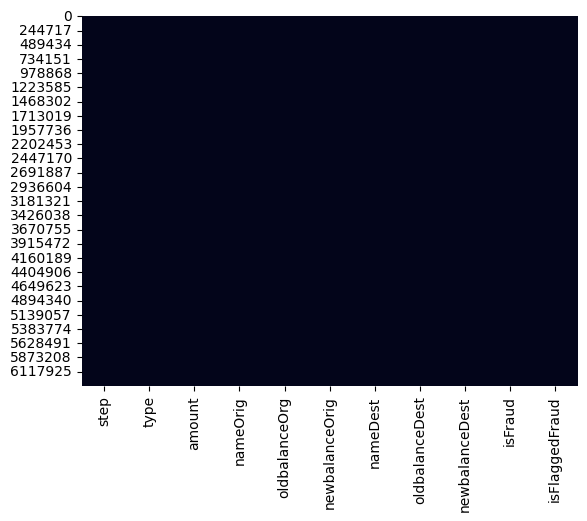

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print("\n" + "="*50 + "\n")

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: count, Length: 5316900, dtype: int64


nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64


oldbalanceOrg
0.00         2102449
184.00           918
133.00           914
195.00           912
164.00           909
              ...   
34577.49           1
1849

In [ ]:
df[df["isFraud"]==1].head(30)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.00,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1,0


In [ ]:
df.loc[ :, ['type', 'isFraud']]

,type,isFraud
0,PAYMENT,0
1,PAYMENT,0
2,TRANSFER,1
3,CASH_OUT,1
4,PAYMENT,0
...,...,...
6362615,CASH_OUT,1
6362616,TRANSFER,1
6362617,CASH_OUT,1
6362618,TRANSFER,1


**********************************

 Quels types de transactions (type) sont le plus souvent associés à des fraudes (isFraud), et quels sont les montants typiques de ces transactions ?

In [ ]:
# Calculation of average and median amounts for each type of transaction based on the fraud indicator
fraud_analysis = df.groupby(['type', 'isFraud'])['amount'].agg(['mean', 'median', 'count']).reset_index()

# Rename columns for clarity
fraud_analysis.columns = ['type', 'isFraud', 'mean_amount', 'median_amount', 'count']

fraud_analysis

,type,isFraud,mean_amount,median_amount,count
0,CASH_IN,0,1.689202e+05,143427.710,1399284
1,CASH_OUT,0,1.739172e+05,146946.560,2233384
2,CASH_OUT,1,1.455103e+06,435516.905,4116
3,DEBIT,0,5.483665e+03,3048.990,41432
4,PAYMENT,0,1.305760e+04,9482.190,2151495
5,TRANSFER,0,9.062290e+05,486521.910,528812
6,TRANSFER,1,1.480892e+06,445705.760,4097


In [ ]:
# filter results for fraudulent transactions only
fraud_only = fraud_analysis[fraud_analysis['isFraud'] == 1]

# Show results only for fraudulent transactions
fraud_only

,type,isFraud,mean_amount,median_amount,count
2,CASH_OUT,1,1.455103e+06,435516.905,4116
6,TRANSFER,1,1.480892e+06,445705.760,4097


In [ ]:
df_cash_in=df[df['type']=='CASH_IN']
unique_cash_in=df_cash_in['isFraud'].unique(
)
unique_cash_in

array([0])

In [ ]:
df_DEBIT=df[df['type']=='DEBIT']
unique_DEBIT=df_DEBIT['isFraud'].unique(
)
unique_DEBIT

array([0])

In [ ]:
df_PAYMENT=df[df['type']=='PAYMENT']
unique_PAYMENT=df_PAYMENT['isFraud'].unique(
)
unique_PAYMENT

array([0])

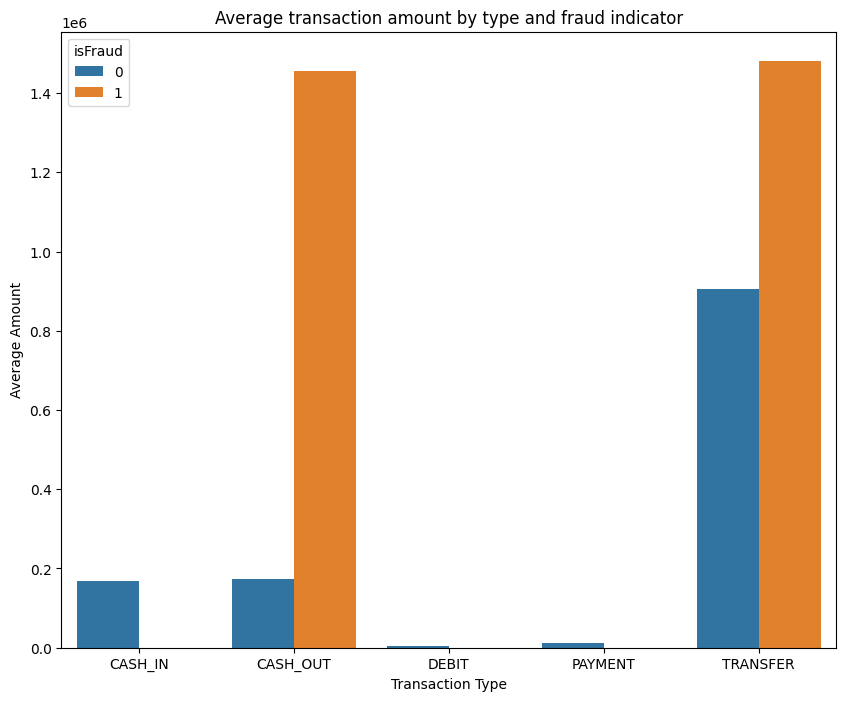

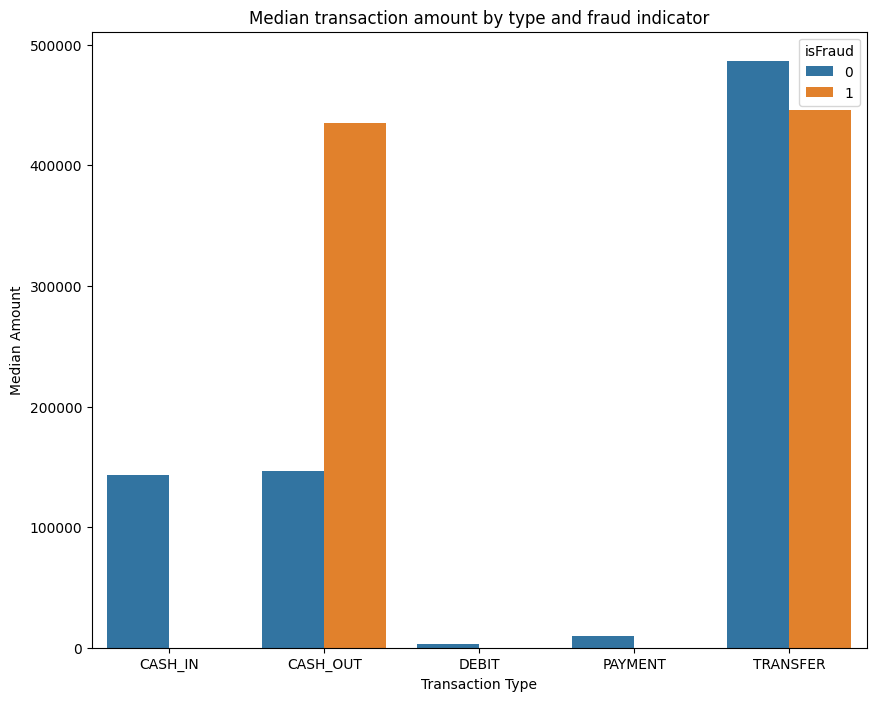

In [ ]:
#Barplot for average amounts by transaction type
plt.figure(figsize=(10, 8))
sns.barplot(x='type', y='mean_amount', hue='isFraud', data=fraud_analysis)
plt.title('Average transaction amount by type and fraud indicator')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.show()

# Barplot for median amounts by transaction type
plt.figure(figsize=(10, 8))
sns.barplot(x='type', y='median_amount', hue='isFraud', data=fraud_analysis)
plt.title('Median transaction amount by type and fraud indicator')
plt.xlabel('Transaction Type')
plt.ylabel('Median Amount')
plt.show()


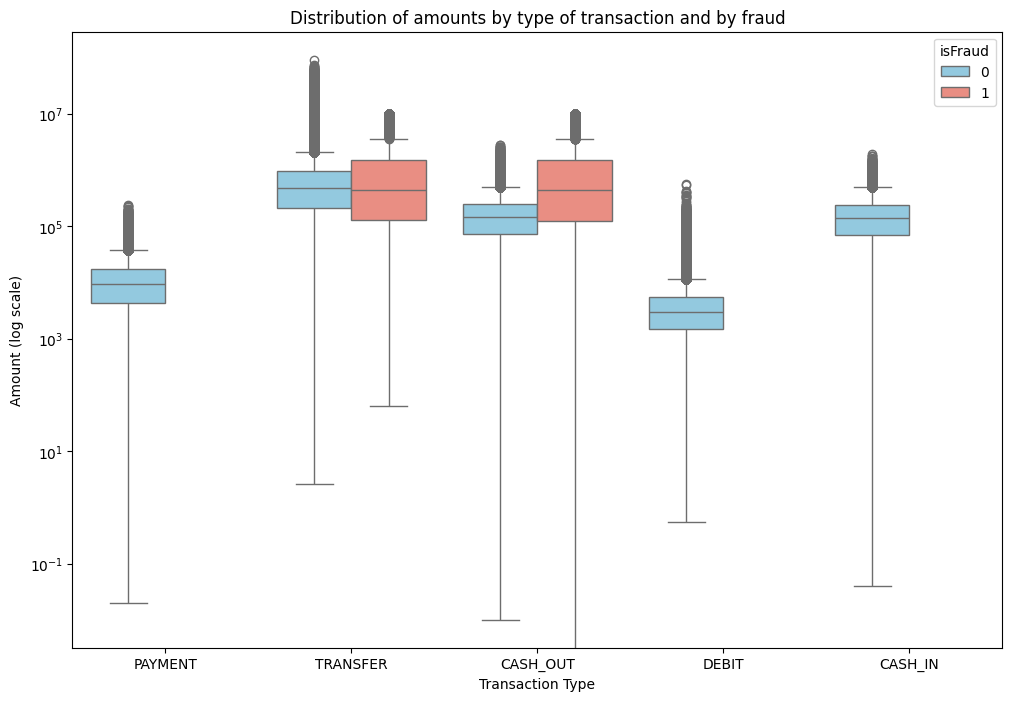

In [ ]:
# Boxplot to visualize the distribution of amounts by transaction type and by fraud
plt.figure(figsize=(12, 8))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df, palette={0: 'skyblue', 1: 'salmon'})
plt.yscale('log')
plt.title('Distribution of amounts by type of transaction and by fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (log scale)')
plt.show()

In [ ]:
fraudulent_transa = df[df['isFraud'] == 1]['amount']
non_fraudulent_transa = df[df['isFraud'] == 0]['amount']

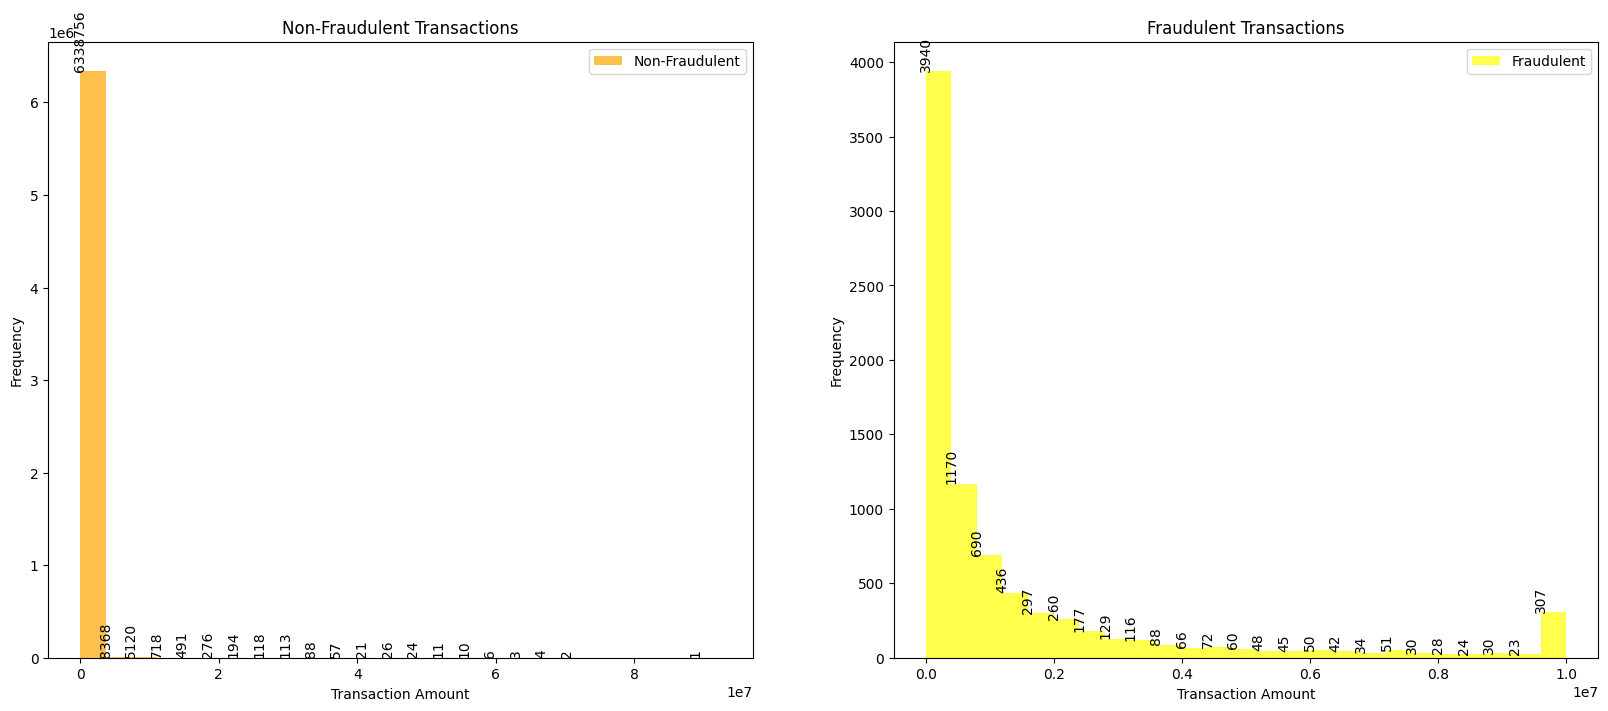

In [ ]:
# Function to plot and annotate histograms
def plot_histogram(data, title, color, label):
    n, bins, patches = plt.hist(data, bins=25, alpha=0.7, color=color, label=label)
    plt.title(title)
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.legend()

    # Annotating each bar with its count (vertical text)
    for count, bin_value in zip(n, bins):
        if count > 0:  # Only annotate non-zero counts
            plt.text(bin_value + 0.5, count, str(int(count)), ha='center', va='bottom', rotation='vertical')

# Create two subplots
plt.figure(figsize=(20, 8))

# Plotting for non-fraudulent transactions
plt.subplot(1, 2, 1)
plot_histogram(non_fraudulent_transa, 'Non-Fraudulent Transactions', 'orange', 'Non-Fraudulent')

# Plotting for fraudulent transactions
plt.subplot(1, 2, 2)
plot_histogram(fraudulent_transa, 'Fraudulent Transactions', 'yellow', 'Fraudulent')

plt.show()

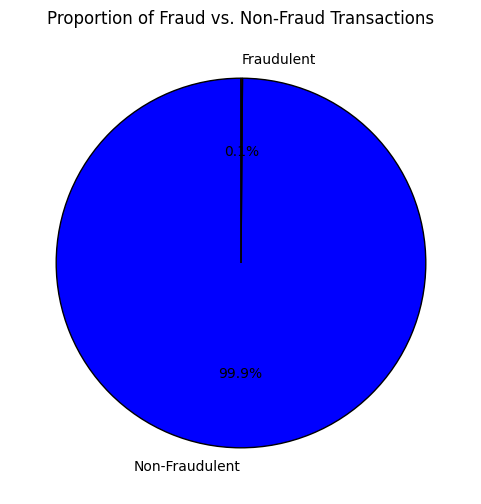

In [ ]:
# Plot a pie chart for fraud vs. non-fraud transactions
def plot_pie_chart(data, labels, title, colors):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(title)
    plt.show()

# Count the number of fraudulent and non-fraudulent transactions
fraud_counts = df['isFraud'].value_counts()
labels = ['Non-Fraudulent', 'Fraudulent']
colors = ['blue', 'red']

# Plot the pie chart
plot_pie_chart(fraud_counts, labels, 'Proportion of Fraud vs. Non-Fraud Transactions', colors)


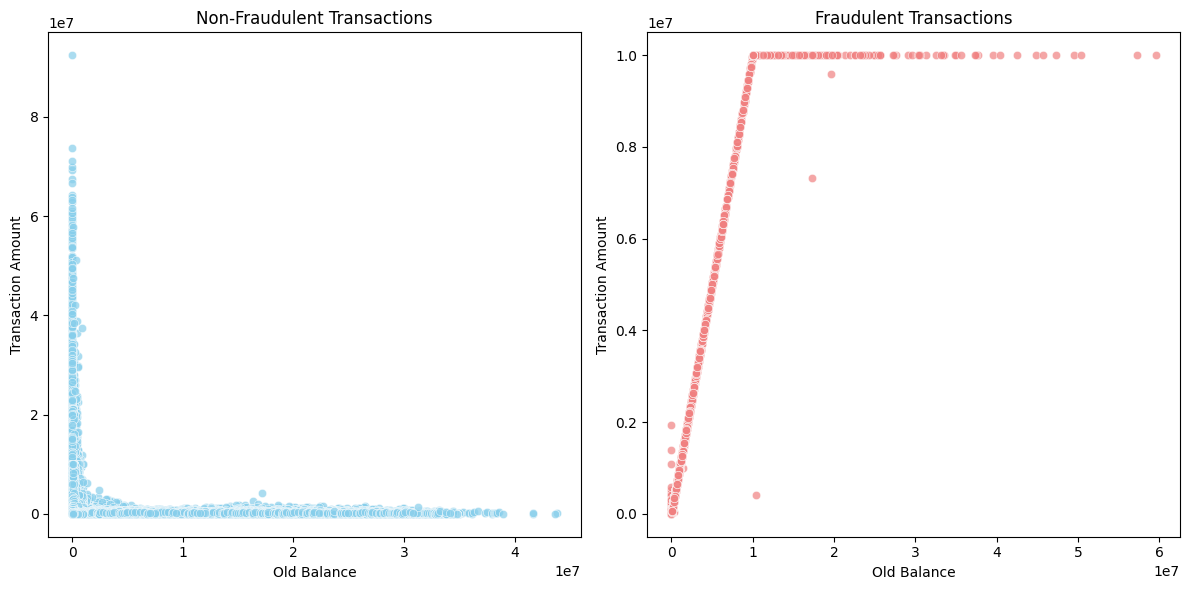

In [ ]:
# Create two scatter plots for fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 6))

# Scatter plot for non-fraudulent transactions
plt.subplot(1, 2, 1)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df[df['isFraud'] == 0], color='skyblue', alpha=0.7)
plt.title('Non-Fraudulent Transactions')
plt.xlabel('Old Balance')
plt.ylabel('Transaction Amount')

# Scatter plot for fraudulent transactions
plt.subplot(1, 2, 2)
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df[df['isFraud'] == 1], color='lightcoral', alpha=0.7)
plt.title('Fraudulent Transactions')
plt.xlabel('Old Balance')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()


In [ ]:
df.columns.tolist()

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


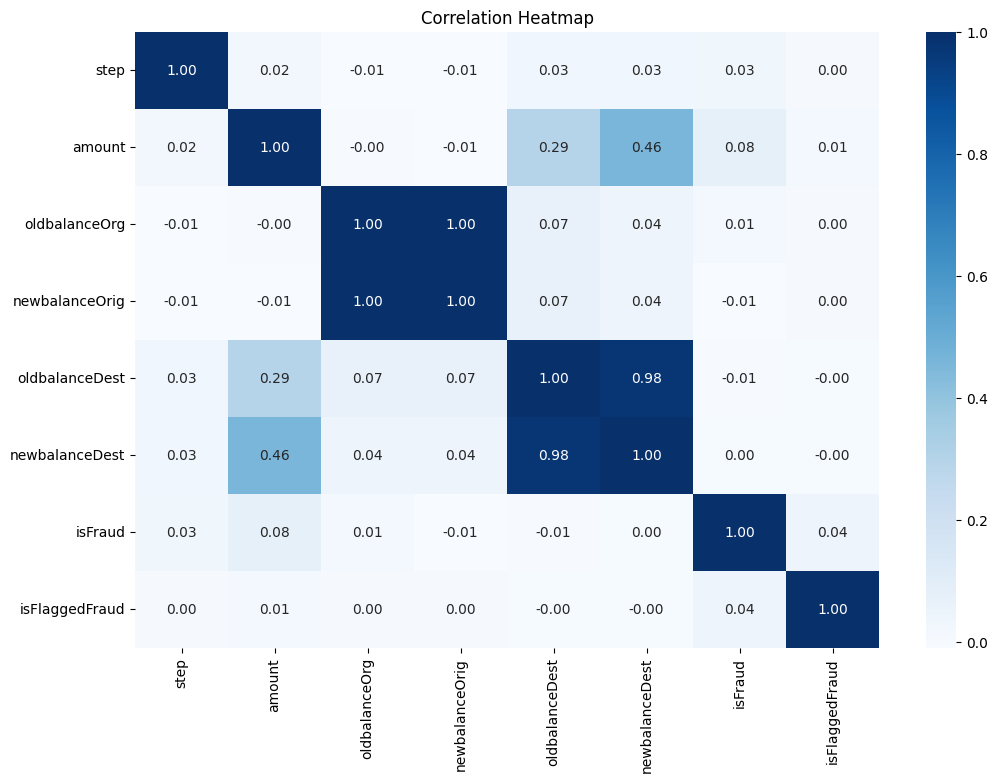

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## ***Data Preprocessing***

In [ ]:
# Encode categorical features
enc_type = LabelEncoder()
df['type'] = enc_type.fit_transform(df['type'])
enc_nameOrig = LabelEncoder()
df['nameOrig'] = enc_nameOrig.fit_transform(df['nameOrig'])
enc_nameDest = LabelEncoder()
df['nameDest'] = enc_nameDest.fit_transform(df['nameDest'])


In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [ ]:
# Normalize numerical features
scaler = StandardScaler()
df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = scaler.fit_transform(
    df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])

## ***Data Preparation***

In [ ]:
#Drop the 'step' column
df = df.drop(columns=['step'])

In [ ]:
df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,3,-0.281560,757869,-0.229810,-0.237622,1662094,-0.323814,-0.333411,0,0
1,3,-0.294767,2188998,-0.281359,-0.285812,1733924,-0.323814,-0.333411,0,0
2,4,-0.297555,1002156,-0.288654,-0.292442,439685,-0.323814,-0.333411,1,0
3,1,-0.297555,5828262,-0.288654,-0.292442,391696,-0.317582,-0.333411,1,0
4,3,-0.278532,3445981,-0.274329,-0.282221,828919,-0.323814,-0.333411,0,0
...,...,...,...,...,...,...,...,...,...,...
6362615,1,0.264665,5651847,-0.171108,-0.292442,505863,-0.323814,-0.240959,1,0
6362616,4,10.153953,1737278,1.896491,-0.292442,260949,-0.323814,-0.333411,1,0
6362617,1,10.153953,533958,1.896491,-0.292442,108224,-0.303665,1.403027,1,0
6362618,4,1.109765,2252932,0.005581,-0.292442,319713,-0.323814,-0.333411,1,0


In [ ]:
# Define X (features) and y (target)
X = df.drop(columns=['isFraud'])  # Features (all columns except isFraud)
y = df['isFraud']  # Target (isFraud column)

In [ ]:
# Split the data into training and test sets
# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Output the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")

Training features shape: (5090096, 9)
Test features shape: (1272524, 9)
Training target shape: (5090096,)
Test target shape: (1272524,)


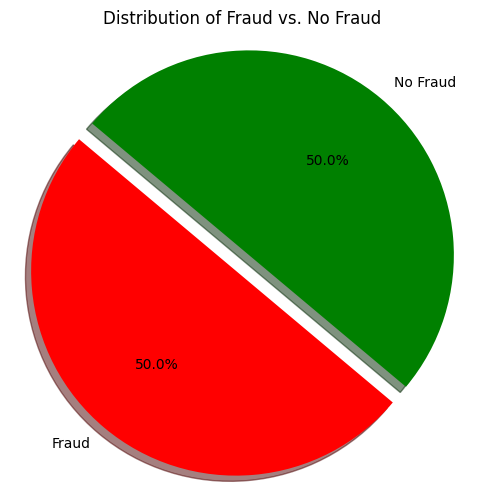

In [ ]:
# Apply SMOTE to balance the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the number of each class in y_train_resampled
fraud_count = (y_train_resampled == 1).sum()
nofraud_count = (y_train_resampled == 0).sum()

# Create a pie chart for the distribution
labels = ['Fraud', 'No Fraud']
sizes = [fraud_count, nofraud_count]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the 'Fraud' slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Fraud vs. No Fraud')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##***ML Models***

### *1- Decision Tree classifier*

In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the resampled training data
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.9993163193778664
Precision: 0.9995436132896796
Recall: 0.9993163193778664
F1 Score: 0.9993858006158932
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.66      0.99      0.79      1643

    accuracy                           1.00   1272524
   macro avg       0.83      1.00      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



****************************

In [ ]:
# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the XGBoost model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict the target labels on the test data
predXGB = xgb_model.predict(X_test)

# Calculate evaluation metrics
accXGB = accuracy_score(y_test, predXGB)
precXGB = precision_score(y_test, predXGB, average='weighted')
recaXGB = recall_score(y_test, predXGB, average='weighted')

# Print the results
print("Results on test data")
print(f'Test accuracy = {accXGB:.4f}')
print(f'Precision = {precXGB:.4f}')
print(f'Recall = {recaXGB:.4f}')
print("Classification report:")
print(classification_report(y_test, predXGB))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:40:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results on test data
Test accuracy = 0.9978
Precision = 0.9992
Recall = 0.9978
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.37      0.99      0.53      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.99      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



*************************

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create and fit the KNN model
modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(X_train_resampled, y_train_resampled)

# Predict the test set labels
pred_testknn = modelknn.predict(X_test)

# Print the classification report
print("Classification report:")
print(classification_report(y_test, pred_testknn))


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94   1270881
           1       0.00      0.17      0.00      1643

    accuracy                           0.88   1272524
   macro avg       0.50      0.53      0.47   1272524
weighted avg       1.00      0.88      0.94   1272524

